In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

In [6]:
#Loading Data
loan_data_default=pd.read_csv('loan_data_default')

c:\users\rhitc\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (50) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Splitting

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
ead_input_train,ead_input_test,ead_target_train,ead_target_test=train_test_split(loan_data_default.drop(['recoveries','recovery_Rate_0_1','CCF'],axis=1),loan_data_default['CCF'],test_size=0.2,random_state=42)

In [9]:
features_all=['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'home_ownership:MORTGAGE',
'home_ownership:ANY',
'home_ownership:OTHER',
'home_ownership:NONE',
'home_ownership:RENT',
'home_ownership:OWN',
'purpose:debt_consolidation',
'purpose:credit_card',
'purpose:car', 
'purpose:home_improvement', 
'purpose:moving',
'purpose:educational', 
'purpose:medical',
'purpose:major_purchase',
'purpose:renewable_energy',
'purpose:other',
'purpose:wedding',
'purpose:vacation',
'purpose:small_business',
'initial_list_status:f',
'initial_list_status:w',
'emp_length_int',
'term_int',
'months_since_credit_Cr_line',
'months_issue_date',
'funded_amnt',
'int_rate',
'installment',
'annual_inc',
'dti',
'delinq_2yrs',
'inq_last_6mths',
'mths_since_last_record',
'mths_since_last_delinq',
'open_acc',
'pub_rec',
'total_acc',
'total_rev_hi_lim',
'acc_now_delinq'
]

In [10]:
features_ref_cat=['grade:G',
'verification_status:Verified',
'home_ownership:RENT',
'purpose:credit_card',
'initial_list_status:f'
]

In [12]:
ead_input_train=ead_input_train[features_all]

In [13]:
ead_input_train=ead_input_train.drop(features_ref_cat,axis=1)

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
reg_ead=LinearRegression()

In [16]:
reg_ead.fit(ead_input_train,ead_target_train)

LinearRegression()

In [43]:
import pickle
pickle.dump(reg_ead,open('reg_ead.sav','wb'))

# Summary Table

In [18]:
summary_table=pd.DataFrame(columns=['Feature name'],data=ead_input_train.columns.values)
summary_table['Coefficients']=np.transpose(reg_ead.coef_)
summary_table.index=summary_table.index+1
summary_table.loc[0]=['Intercept',reg_ead.intercept_]

In [25]:
summary_table

,Feature name,Coefficients
1,grade:A,-3.031913e-01
2,grade:B,-2.366800e-01
3,grade:C,-1.722786e-01
4,grade:D,-1.200669e-01
5,grade:E,-6.785090e-02
6,grade:F,-2.058036e-02
7,verification_status:Not Verified,1.442094e-05
8,verification_status:Source Verified,8.976350e-03
9,home_ownership:MORTGAGE,-6.359938e-03
10,home_ownership:ANY,1.227803e-12


# Validation

In [26]:
ead_input_test=ead_input_test[features_all]

In [27]:
ead_input_test=ead_input_test.drop(features_ref_cat,axis=1)

In [28]:
y_hat_test_ead=reg_ead.predict(ead_input_test)

In [29]:
y_hat_test_ead

array([0.68071471, 0.65823282, 0.86955999, ..., 0.68040726, 0.79689349,
       0.90306727])

In [31]:
ead_target_test_temp=ead_target_test.copy()

In [32]:
ead_target_test_temp=ead_target_test_temp.reset_index(drop=True)

In [35]:
pd.concat([ead_target_test_temp,pd.DataFrame(y_hat_test_ead)],axis=1).corr()

,CCF,0
CCF,1.000000,0.530586
0,0.530586,1.000000


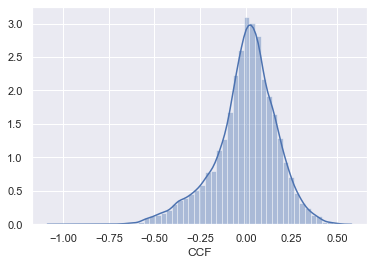

In [38]:
sns.distplot(ead_target_test-y_hat_test_ead)

Correlation of 0.53 is good for EAD model and Residual Error is also Normally Distributes around 0.

In [39]:
pd.DataFrame(y_hat_test_ead).describe()

,0
count,8648.000000
mean,0.736024
std,0.105181
min,0.385675
25%,0.661641
50%,0.731637
75%,0.810575
max,1.160394


In [40]:
y_hat_test_ead=np.where(y_hat_test_ead<0,0,y_hat_test_ead)
y_hat_test_ead=np.where(y_hat_test_ead>1,1,y_hat_test_ead)

In [41]:
pd.DataFrame(y_hat_test_ead).describe()

,0
count,8648.000000
mean,0.736003
std,0.105114
min,0.385675
25%,0.661641
50%,0.731637
75%,0.810575
max,1.000000
